## Setup

In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.cosmology import FlatLambdaCDM
from astropy import units as u

F_comp = 80 # flux completeness %
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
redshift_bins = [(0.00, 0.30), (0.30, 0.45), (0.45, 0.60), 
                 (0.60, 0.80), (0.80, 1.00), (1.00, 1.20),
                 (1.20, 1.70), (1.70, 2.00), (2.00, 2.50),
                 (2.50, 3.00), (3.00, 4.20), (4.20, 6.00)] # redshift bins

## Load Data

In [187]:
# All ZFOURGE sources
CDFS = pd.read_csv('../DATA/ZFOURGE/CDFS/CDFS_MAIN3.csv', index_col='Seq')
COSMOS = pd.read_csv('../DATA/ZFOURGE/COSMOS/COSMOS_MAIN3.csv', index_col='Seq')
UDS = pd.read_csv('../DATA/ZFOURGE/UDS/UDS_MAIN3.csv', index_col='Seq')

# All CIGALE sources
oCDFS = pd.read_csv('../DATA/Ollie Data/CDFS/results.txt', delim_whitespace=True, index_col='id')
oCOSMOS = pd.read_csv('../DATA/Ollie Data/COSMOS/results.txt', delim_whitespace=True, index_col='id')
oUDS = pd.read_csv('../DATA/Ollie Data/UDS/results.txt', delim_whitespace=True, index_col='id')

## Mask Bad Data

In [188]:
def mask_data(zfourge, cigale, survey_name):
    # Use Mask
    use_mask = zfourge['Use'] == 1
    zfourge = zfourge.loc[use_mask]
    cigale = cigale.loc[use_mask]
    # print(f'Number of ZFOURGE {survey_name} sources Use=1: {len(zfourge)}')
    print(f'Number of CIGALE {survey_name} sources Use=1: {len(cigale)}')

    # LIR Mask
    lir_mask = zfourge['LIR'] > 0 
    zfourge = zfourge.loc[lir_mask]
    cigale = cigale.loc[lir_mask]
    # print(f'Number of ZFOURGE {survey_name} sources LIR>0: {len(zfourge)}')
    print(f'Number of CIGALE {survey_name} sources LIR>0: {len(cigale)}')

    # F24 Mask
    F24_mask = zfourge['F24'] > 0 
    zfourge = zfourge.loc[F24_mask]
    cigale = cigale.loc[F24_mask]
    # print(f'Number of ZFOURGE {survey_name} sources F24>0: {len(zfourge)}')
    print(f'Number of CIGALE {survey_name} sources F24>0: {len(cigale)}')

    # Redshift Mask
    red_mask = (zfourge['zpk'] >= redshift_bins[0][0]) & (zfourge['zpk'] <= redshift_bins[-1][1]) 
    zfourge = zfourge.loc[red_mask]
    cigale = cigale.loc[red_mask]
    # print(f'Number of ZFOURGE {survey_name} sources {redshift_bins[0][0]} <= z <= {redshift_bins[-1][1]}: {len(zfourge)}')
    print(f'Number of CIGALE {survey_name} sources {redshift_bins[0][0]} <= z <= {redshift_bins[-1][1]}: {len(cigale)}')

    # AGN Mask
    agn_mask = (zfourge['irAGN'] == 1) | (zfourge['radAGN'] == 1) | (zfourge['xAGN'] == 1) 
    zfourge = zfourge.loc[~agn_mask]
    cigale = cigale.loc[~agn_mask]
    # print(f'Number of ZFOURGE {survey_name} sources AGN=0: {len(zfourge)}')
    print(f'Number of CIGALE {survey_name} sources AGN=0: {len(cigale)}')
    
    # Nan Mask
    nan_mask = ~np.isnan(cigale['bayes.universe.luminosity_distance'])
    zfourge = zfourge.loc[nan_mask]
    cigale = cigale.loc[nan_mask]
    # print(f'Number of ZFOURGE {survey_name} sources Nan=0: {len(zfourge)}')
    print(f'Number of CIGALE {survey_name} sources Nan=0: {len(cigale)}')
    
    # Redshift Mask
    z_mask = cigale['bayes.universe.redshift'] > 0
    zfourge = zfourge.loc[z_mask]
    cigale = cigale.loc[z_mask]
    # print(f'Number of ZFOURGE {survey_name} sources z>0: {len(zfourge)}')
    print(f'Number of CIGALE {survey_name} sources z>0: {len(cigale)}')
    
    # Common sources
    common_sources = zfourge.index.intersection(cigale.index)
    zfourge = zfourge.loc[common_sources]
    cigale = cigale.loc[common_sources]
    print(f'Number of common sources: {len(zfourge)}')
    print('\n')
    return zfourge, cigale

print(f'Total number of sources CIGALE: {len(oCDFS) + len(oCOSMOS) + len(oUDS)} \n')
CDFS_m, oCDFS_m = mask_data(CDFS, oCDFS, 'CDFS')
COSMOS_m, oCOSMOS_m = mask_data(COSMOS, oCOSMOS, 'COSMOS')
UDS_m, oUDS_m = mask_data(UDS, oUDS, 'UDS')

# All ZFOURGE sources
df = pd.concat([CDFS_m, COSMOS_m, UDS_m], ignore_index=True)
odf = pd.concat([oCDFS_m, oCOSMOS_m, oUDS_m], ignore_index=True)
print(f'Number of ZFOURGE sources: {len(df)}')
print(f'Number of CIGALE sources: {len(odf)}')

Total number of sources CIGALE: 73758 

Number of CIGALE CDFS sources Use=1: 13299
Number of CIGALE CDFS sources LIR>0: 8486
Number of CIGALE CDFS sources F24>0: 8486
Number of CIGALE CDFS sources 0.0 <= z <= 6.0: 8469
Number of CIGALE CDFS sources AGN=0: 8193
Number of CIGALE CDFS sources Nan=0: 8187
Number of CIGALE CDFS sources z>0: 8187
Number of common sources: 8187


Number of CIGALE COSMOS sources Use=1: 12901
Number of CIGALE COSMOS sources LIR>0: 7954
Number of CIGALE COSMOS sources F24>0: 7954
Number of CIGALE COSMOS sources 0.0 <= z <= 6.0: 7947
Number of CIGALE COSMOS sources AGN=0: 7815
Number of CIGALE COSMOS sources Nan=0: 7815
Number of CIGALE COSMOS sources z>0: 7814
Number of common sources: 7814


Number of CIGALE UDS sources Use=1: 11447
Number of CIGALE UDS sources LIR>0: 6557
Number of CIGALE UDS sources F24>0: 6557
Number of CIGALE UDS sources 0.0 <= z <= 6.0: 6551
Number of CIGALE UDS sources AGN=0: 6436
Number of CIGALE UDS sources Nan=0: 6436
Number of CIGALE 

## Sanity Check

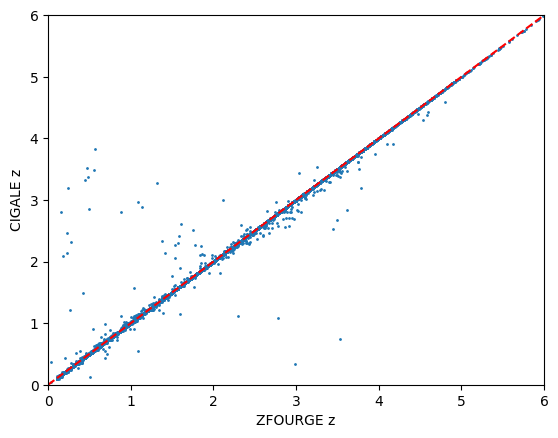

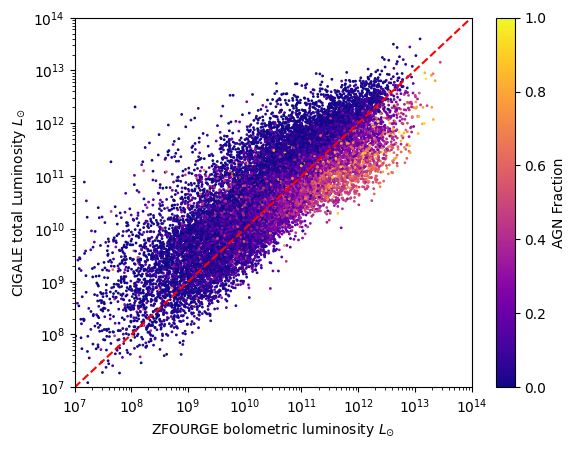

In [189]:
# Redshift
z_ZF = df['zpk'].values.copy()
z_CG = odf['bayes.universe.redshift'].values.copy() 
plt.scatter(z_ZF, z_CG, s=1)
plt.plot([0, 6], [0, 6], color='red', linestyle='--')
plt.xlabel('ZFOURGE z')
plt.ylabel('CIGALE z')
plt.xlim(0, 6)
plt.ylim(0, 6)
plt.show()

# AGN Fraction
AGN_frac = (odf['bayes.agn.luminosity'].values.copy()) / (odf['bayes.stellar.lum'].values.copy() + odf['bayes.dust.luminosity'].values.copy() + odf['bayes.agn.luminosity'].values.copy())

# Luminosity
lum_zf = df['LIR'].values.copy() # solar luminosity
lum_cg = (odf['bayes.stellar.lum'].values.copy() + odf['bayes.dust.luminosity'].values.copy() + odf['bayes.agn.luminosity'].values.copy())*2.612*10**-27 # solar luminosity
plt.scatter(lum_zf, lum_cg, s=1, cmap='plasma', c=AGN_frac, vmin=0, vmax=1)
plt.plot([10**6, 10**14], [10**6, 10**14], color='red', linestyle='--')
plt.colorbar(label='AGN Fraction')
plt.xlabel('ZFOURGE bolometric luminosity $L_{\odot}$')
plt.ylabel('CIGALE total Luminosity $L_{\odot}$')
plt.xscale('log')
plt.yscale('log')
plt.xlim(10**7, 10**14)
plt.ylim(10**7, 10**14)
plt.show()

## Bolometric Flux

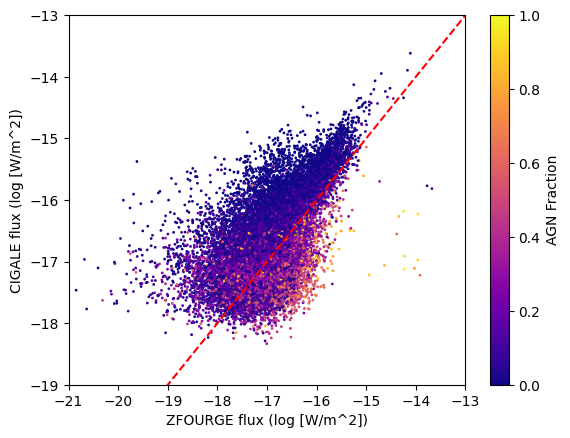

In [190]:
# Luminosity distance
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
dL_ZF = cosmo.luminosity_distance(z_ZF).to(u.m).value
dL_CG = cosmo.luminosity_distance(z_CG).to(u.m).value

# Flux
flux_ZF = (lum_zf*3.83*10**26) / (4 * np.pi * dL_ZF**2)
flux_CG = (lum_cg*3.83*10**26) / (4 * np.pi * dL_CG**2)

plt.scatter(np.log10(flux_ZF.astype(float)), np.log10(flux_CG.astype(float)), s=1, cmap='plasma', c=AGN_frac, vmin=0, vmax=1)
plt.colorbar(label='AGN Fraction')
plt.plot([-20, -12], [-20, -12], color='red', linestyle='--')
plt.xlabel('ZFOURGE flux (log [W/m^2])')
plt.ylabel('CIGALE flux (log [W/m^2])')
plt.ylim(-19, -13)
plt.xlim(-21, -13)
plt.show()

## MIPS24 Flux

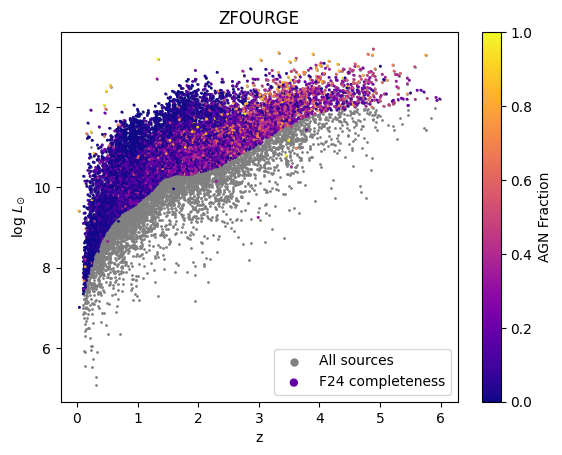

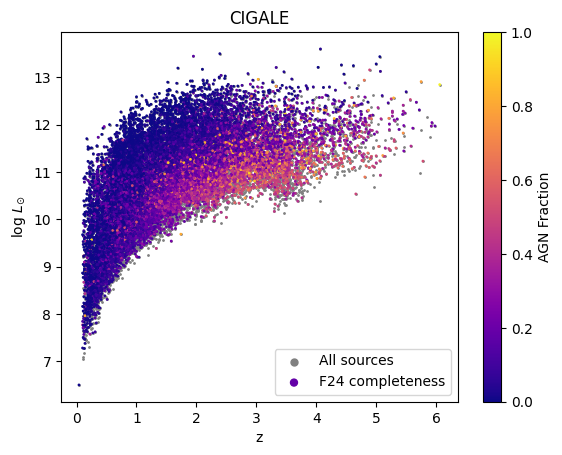

17949


In [191]:
flux_24 = df['F24'].values.copy()
F24_lim = np.percentile(flux_24, 100-F_comp) # % of the data above perc
mask_f24 = flux_24 > F24_lim

plt.scatter(z_ZF, np.log10(lum_zf), s=1, color='grey', label='All sources')
plt.scatter(z_ZF[mask_f24], np.log10(lum_zf[mask_f24]), s=1, label='F24 completeness', cmap='plasma', c=AGN_frac[mask_f24], vmin=0, vmax=1)
plt.colorbar(label='AGN Fraction')
plt.title('ZFOURGE')
plt.ylabel('log $L_{\odot}$')
plt.xlabel('z')
plt.legend(markerscale=5)
plt.show()

plt.scatter(z_CG, np.log10(lum_cg), s=1, color='grey', label='All sources')
plt.scatter(z_CG[mask_f24], np.log10(lum_cg[mask_f24]), s=1, label='F24 completeness', cmap='plasma', c=AGN_frac[mask_f24], vmin=0, vmax=1)
plt.colorbar(label='AGN Fraction')
plt.title('CIGALE')
plt.ylabel('log $L_{\odot}$')
plt.xlabel('z')
plt.legend(markerscale=5)
plt.show()

print(len(z_ZF[mask_f24]))

## MIPS24 & Bolometric Flux

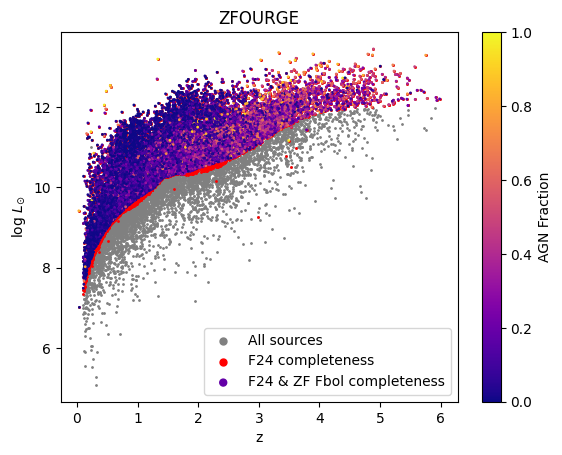

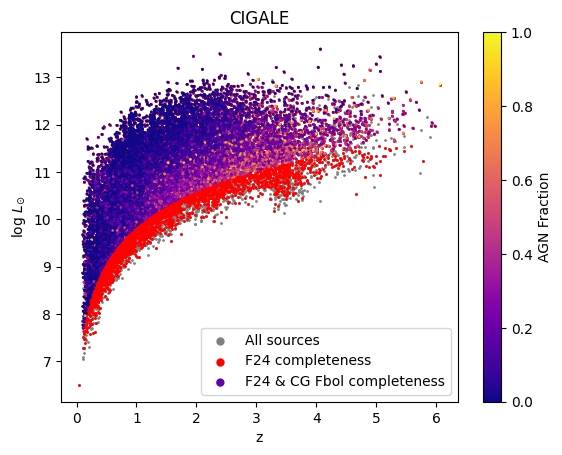

17349
15225


In [192]:
Fbol_lim_zf = np.percentile(flux_ZF, 100-F_comp) # % of the data above perc
mask_fbol_zf = flux_ZF > Fbol_lim_zf

Fbol_lim_cg = np.percentile(flux_CG, 100-F_comp) # % of the data above perc
mask_fbol_cg = flux_CG > Fbol_lim_cg

plt.scatter(z_ZF, np.log10(lum_zf), s=1, color='grey', label='All sources')
plt.scatter(z_ZF[mask_f24], np.log10(lum_zf[mask_f24]), s=1, color='red', label='F24 completeness')
plt.scatter(z_ZF[mask_f24 & mask_fbol_zf], np.log10(lum_zf[mask_f24 & mask_fbol_zf]), s=1, label='F24 & ZF Fbol completeness', cmap='plasma', 
            c=AGN_frac[mask_f24 & mask_fbol_zf], vmin=0, vmax=1)
plt.colorbar(label='AGN Fraction')
plt.title('ZFOURGE')
plt.ylabel('log $L_{\odot}$')
plt.xlabel('z')
plt.legend(markerscale=5)
plt.show()

plt.scatter(z_CG, np.log10(lum_cg), s=1, color='grey', label='All sources')
plt.scatter(z_CG[mask_f24], np.log10(lum_cg[mask_f24]), s=1, color='red', label='F24 completeness')
plt.scatter(z_CG[mask_f24 & mask_fbol_cg], np.log10(lum_cg[mask_f24 & mask_fbol_cg]), s=1, label='F24 & CG Fbol completeness', cmap='plasma',
            c=AGN_frac[mask_f24 & mask_fbol_cg], vmin=0, vmax=1)
plt.colorbar(label='AGN Fraction')
plt.title('CIGALE')
plt.ylabel('log $L_{\odot}$')
plt.xlabel('z')
plt.legend(markerscale=5)
plt.show()

print(len(z_ZF[mask_f24 & mask_fbol_zf]))
print(len(z_CG[mask_f24 & mask_fbol_cg]))

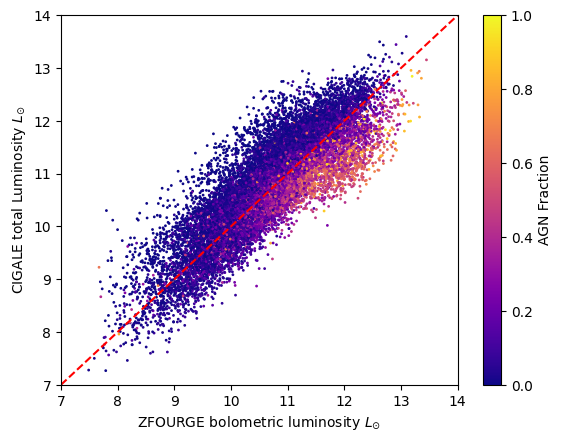

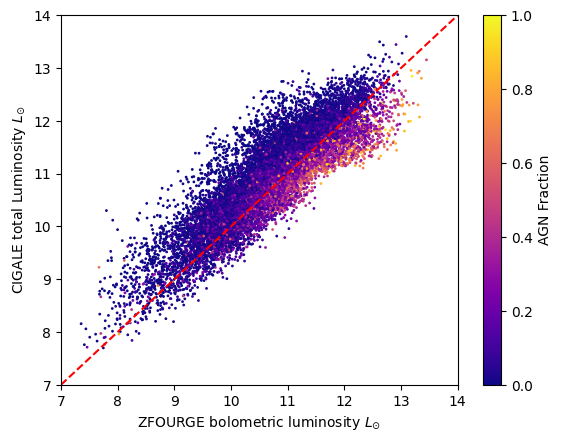

In [193]:
plt.scatter(np.log10(lum_zf[mask_f24 & mask_fbol_zf]), np.log10(lum_cg[mask_f24 & mask_fbol_zf]), s=1,
            cmap='plasma', c=AGN_frac[mask_f24 & mask_fbol_zf], vmin=0, vmax=1)
plt.colorbar(label='AGN Fraction')
plt.plot([7, 14], [7, 14], color='red', linestyle='--')
plt.xlabel('ZFOURGE bolometric luminosity $L_{\odot}$')
plt.ylabel('CIGALE total Luminosity $L_{\odot}$')
plt.xlim(7, 14)
plt.ylim(7, 14)
plt.show()

plt.scatter(np.log10(lum_zf[mask_f24 & mask_fbol_cg]), np.log10(lum_cg[mask_f24 & mask_fbol_cg]), s=1,
            cmap='plasma', c=AGN_frac[mask_f24 & mask_fbol_cg], vmin=0, vmax=1)
plt.colorbar(label='AGN Fraction')
plt.plot([7, 14], [7, 14], color='red', linestyle='--')
plt.xlabel('ZFOURGE bolometric luminosity $L_{\odot}$')
plt.ylabel('CIGALE total Luminosity $L_{\odot}$')
plt.xlim(7, 14)
plt.ylim(7, 14)
plt.show()